/var/folders/rb/rx0t_fxx0gn2216d3_lrhp0h0000gn/T/ipykernel_89899/2969806791.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2022-01-01", end="2024-12-01")
[*********************100%***********************]  1 of 1 completed

Total price points: 732

=== Model Performance ===

Training Set:
  RMSE: $2.74
  MAE: $2.06
  R² Score: 0.9759

Test Set:
  RMSE: $3.30
  MAE: $2.49
  R² Score: 0.9509


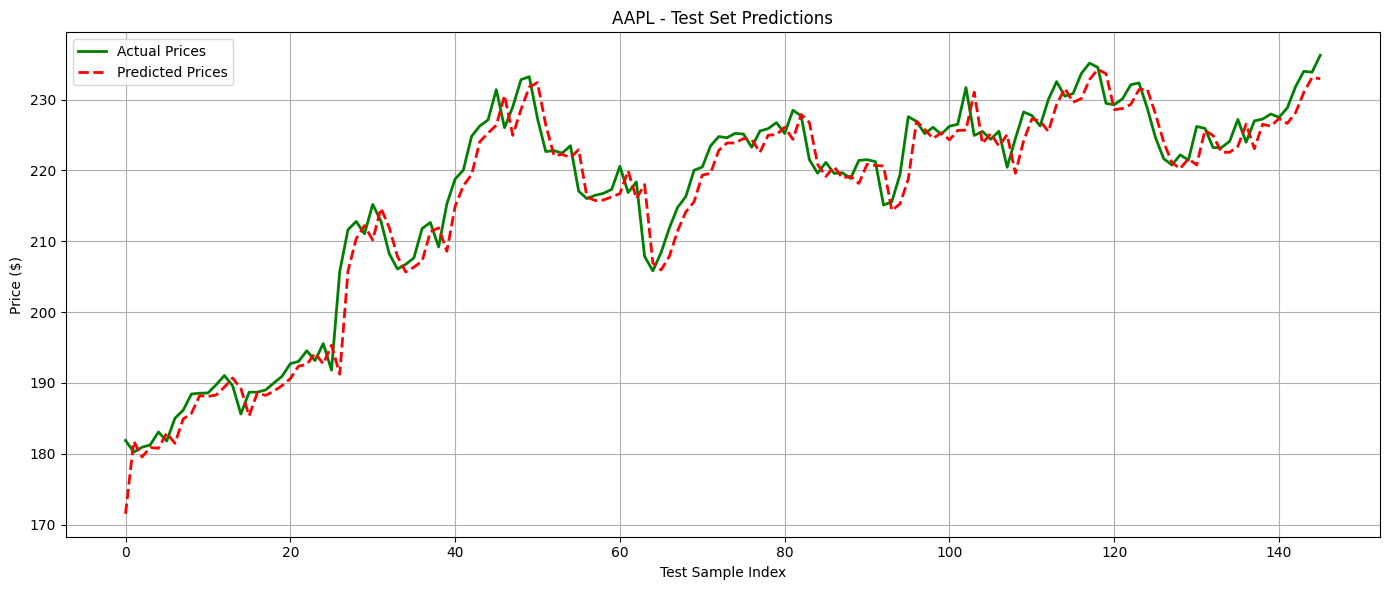

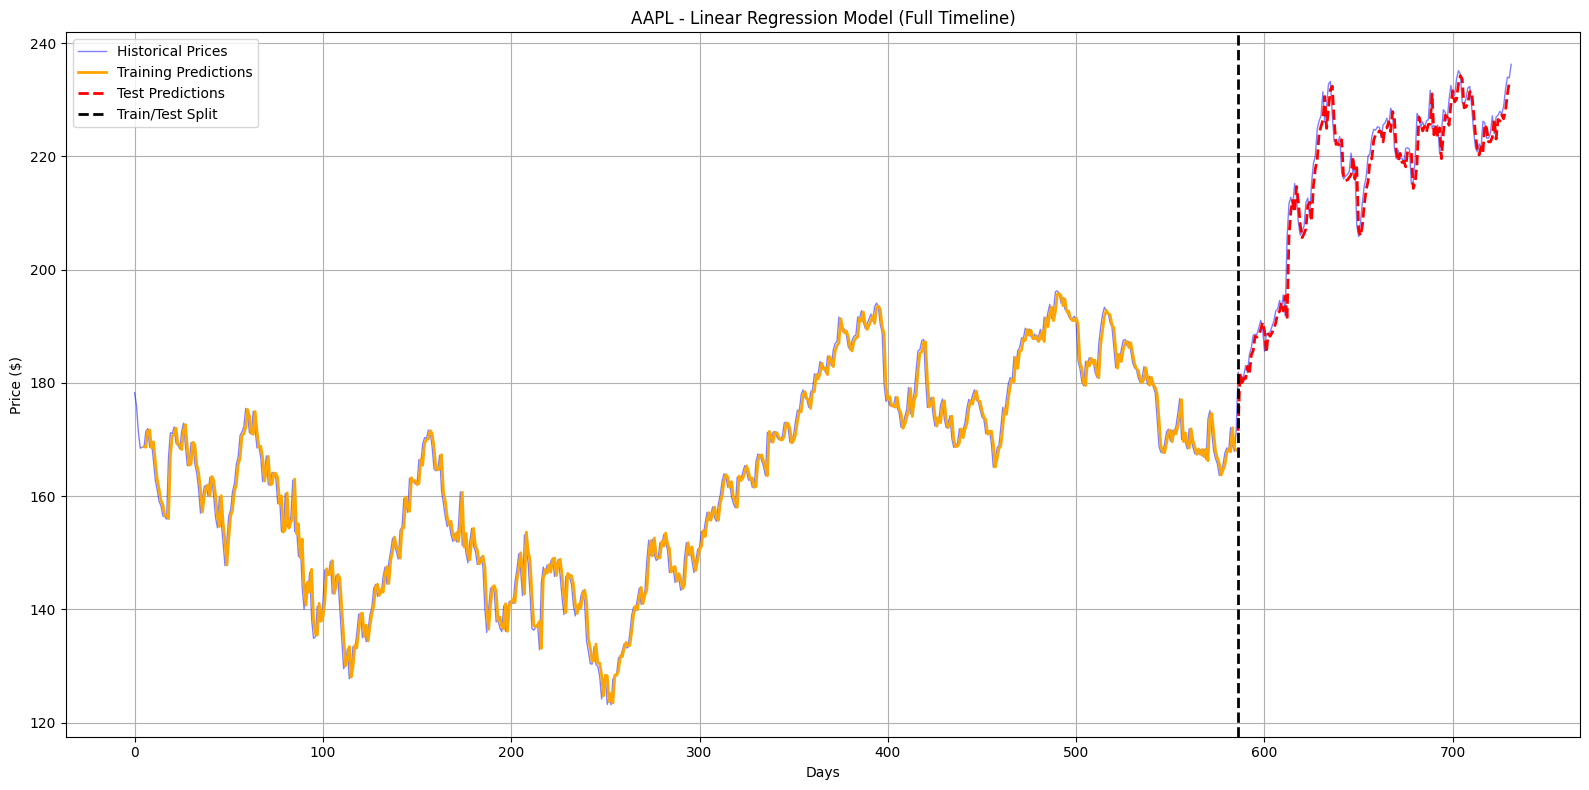

In [16]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

ticker = 'AAPL'
data = yf.download(ticker, start="2022-01-01", end="2024-12-01")
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.droplevel(1)
prices = data['Close'].values

print(f"Total price points: {len(prices)}")

def create_features(prices, window_size=5):
    X = []
    Y = []
    for i in range(len(prices) - window_size):
        X.append(prices[i:i+window_size])
        Y.append(prices[i+window_size])
    return np.array(X), np.array(Y)

window_size = 5
X,Y = create_features(prices, window_size)

split_idx = int(0.8 * len(X))
X_train = X[:split_idx]
X_test = X[split_idx:]
Y_train = Y[:split_idx]
Y_test = Y[split_idx:]

model = LinearRegression()
model.fit(X_train, Y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(Y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(Y_test, y_test_pred))

train_mae = mean_absolute_error(Y_train, y_train_pred)
test_mae = mean_absolute_error(Y_test, y_test_pred)

train_r2 = model.score(X_train, Y_train)
test_r2 = model.score(X_test, Y_test)

print(f"\n=== Model Performance ===")
print(f"\nTraining Set:")
print(f"  RMSE: ${train_rmse:.2f}")
print(f"  MAE: ${train_mae:.2f}")
print(f"  R² Score: {train_r2:.4f}")

print(f"\nTest Set:")
print(f"  RMSE: ${test_rmse:.2f}")
print(f"  MAE: ${test_mae:.2f}")
print(f"  R² Score: {test_r2:.4f}")

plt.figure(figsize=(14, 6))

plt.plot(Y_test, label='Actual Prices', color='green', linewidth=2)

plt.plot(y_test_pred, label='Predicted Prices', color='red', 
         linewidth=2, linestyle='--')

plt.title(f'{ticker} - Test Set Predictions')
plt.xlabel('Test Sample Index')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 8))
train_indices = range(window_size, window_size + len(Y_train))
test_indices = range(window_size + len(Y_train), window_size + len(Y_train) + len(Y_test))

plt.plot(range(len(prices)), prices, label='Historical Prices', 
         color='blue', linewidth=1, alpha=0.5)
plt.plot(train_indices, y_train_pred, label='Training Predictions', 
         color='orange', linewidth=2)
plt.plot(test_indices, y_test_pred, label='Test Predictions', 
         color='red', linewidth=2, linestyle='--')
plt.axvline(window_size + len(Y_train), color='black', linestyle='--', 
            linewidth=2, label='Train/Test Split')

plt.title(f'{ticker} - Linear Regression Model (Full Timeline)')
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()